In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from MStorch import MultiSlice, Propagate
from util import toCPU, toGPU, device
import torch.nn.functional as F


using cuda:0


In [2]:
si_pg = np.fromfile(r'test\Si\Si110_20x14x50.img', dtype=np.complex64, offset=8).reshape(-1,1024,1024)


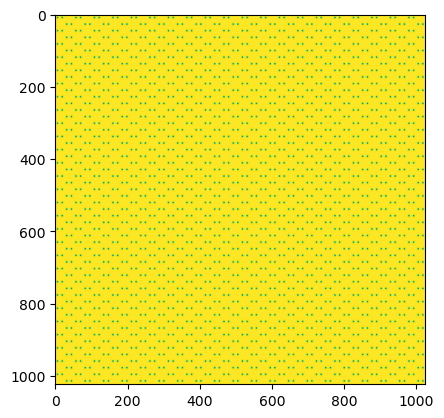

In [3]:
plt.imshow(np.abs(si_pg[0] + si_pg[1]))

In [4]:
mask = torch.ones((1024,1024), dtype=torch.float32, device=device)
probe = np.fromfile('test\Si\probe.img', dtype=np.complex64, offset=8).reshape(1024,1024)
probe = np.roll(probe, (35,70), axis=(0,1))
probe = toGPU(probe)
# probe = torch.ones((1024,1024), dtype=torch.complex64, device=device)

In [5]:
simulator = MultiSlice(mask, eps=0, nSlice=200, zStep=7.6792/4, kV=300, pixelSize=0.10546875, potential=toGPU(si_pg)).to(device)

c:\Users\hcni2\.conda\envs\torch\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
dp = simulator.forward(probe).detach().clone()

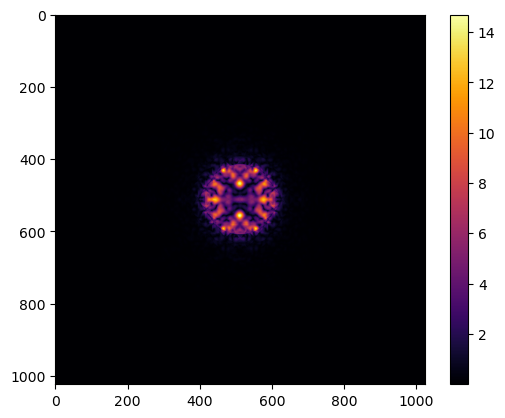

In [7]:
plt.imshow(toCPU(torch.abs(torch.fft.fftshift(torch.fft.fft2(dp)))), cmap='inferno')
plt.colorbar()